# Plot
Description

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import os
import sys

from pathlib import Path

path = (
    Path
    .cwd()
    .parent
    .parent
    .joinpath('warbler')
    .as_posix()
)

os.chdir(path)
sys.path.append(path)

In [2]:
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import seaborn as sns

from constant import PROJECTION
from datatype.dataset import Dataset
from datatype.imaging import to_numpy
from datatype.spectrogram import compress
from io import BytesIO
from matplotlib import lines
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
from scipy.spatial import cKDTree

In [ ]:
plt.style.use('science')

In [3]:
dataset = Dataset('segment')
dataframe = dataset.load()

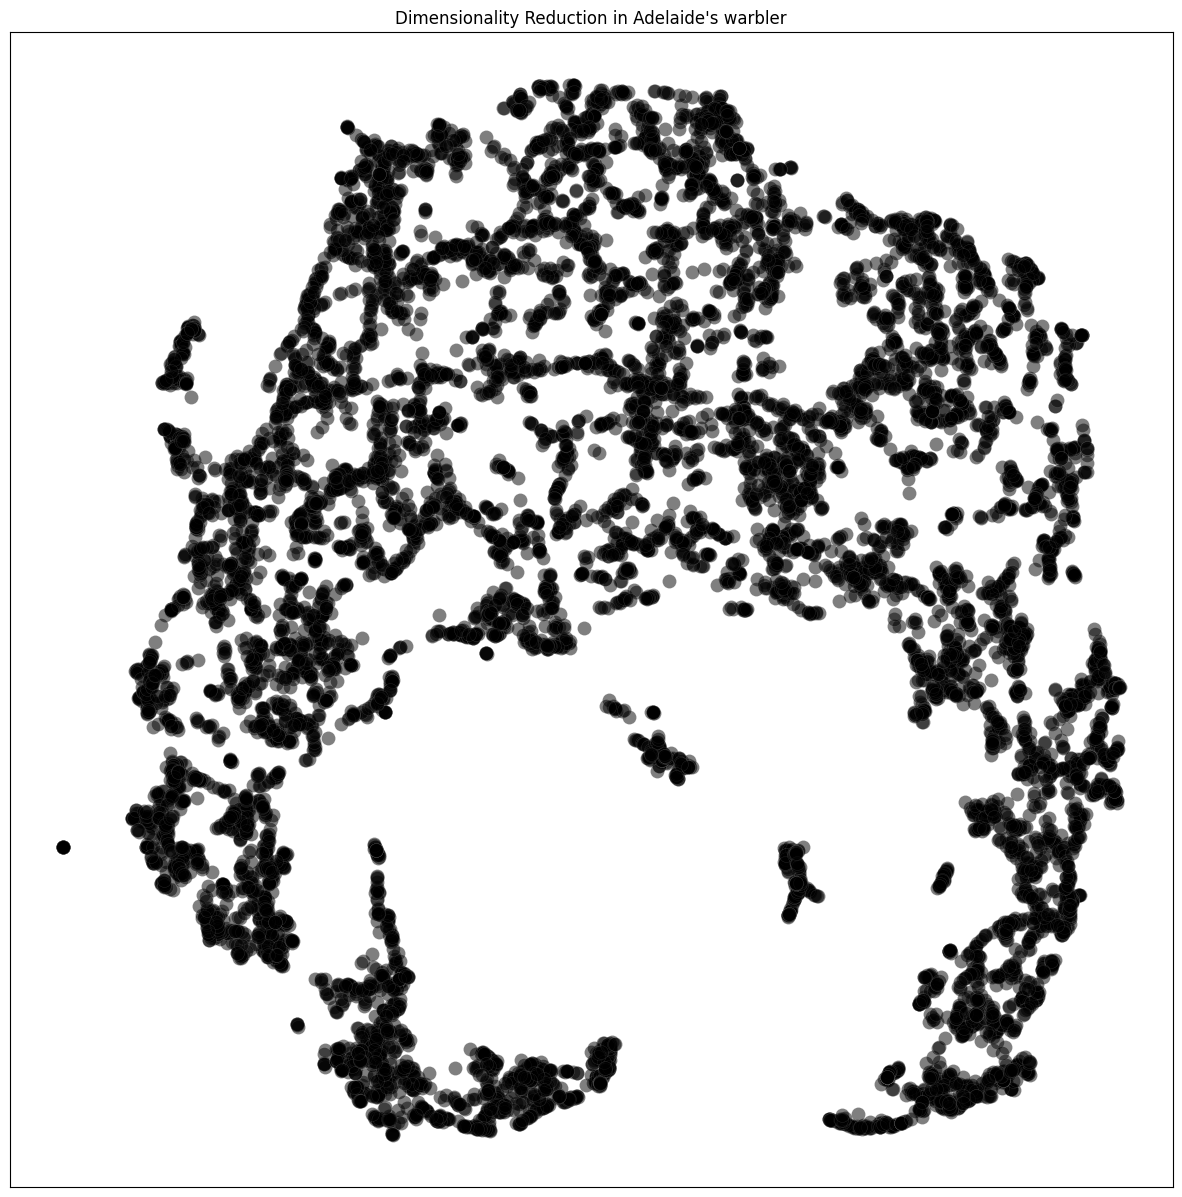

In [4]:
title = 'Dimensionality Reduction in Adelaide\'s warbler'

figsize = (15, 15)
plt.figure(figsize=figsize)

ax = sns.scatterplot(
    dataframe, 
    x='umap_x_2d', 
    y='umap_y_2d',
    alpha=0.50,
    color='black',
    s=100,
    linewidth=0.1
)

ax.set(
    title=title,
    xlabel=None, 
    ylabel=None,
    xticklabels=[],
    yticklabels=[]
)

ax.tick_params(
    bottom=False,
    left=False
)

filename = f"umap_projection.png"
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

plt.close()

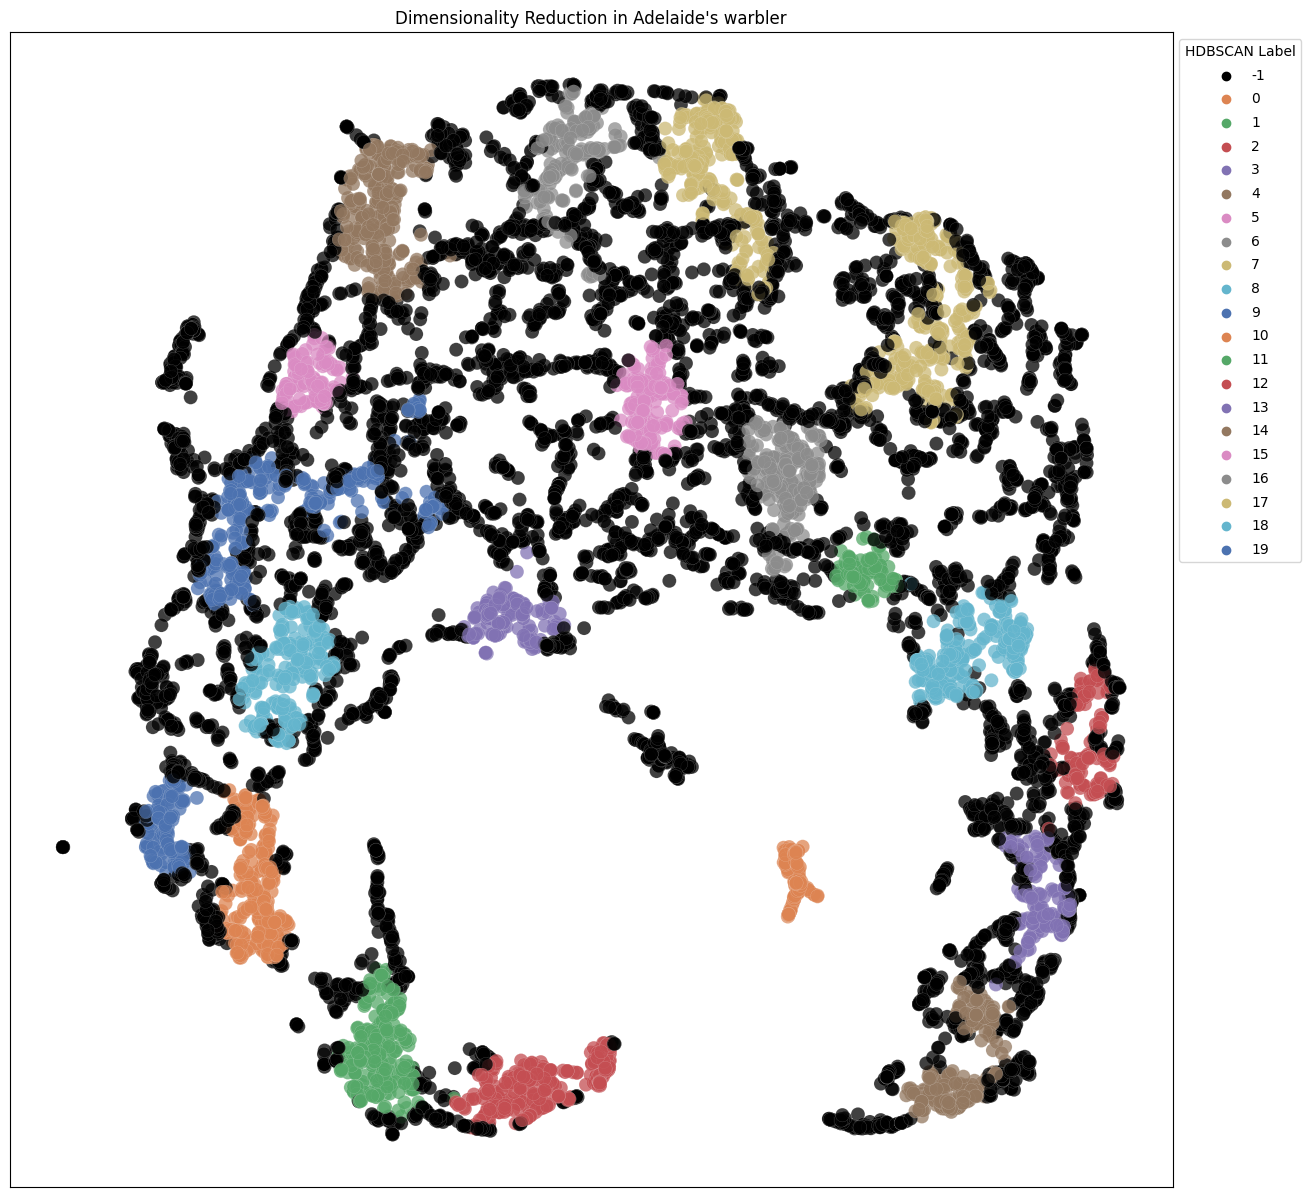

In [7]:
title = 'Dimensionality Reduction in Adelaide\'s warbler'

figsize = (15, 15)
plt.figure(figsize=figsize)

palette = sns.color_palette('deep', 21)
palette[0] = (0, 0, 0)

ax = sns.scatterplot(
    dataframe, 
    x='umap_x_2d', 
    y='umap_y_2d',
    hue='hdbscan_label_2d',
    alpha=0.75,
    color='black',
    palette=palette,
    s=100,
    linewidth=0.1
)

sns.move_legend(
    ax, 
    'upper left', 
    bbox_to_anchor=(1, 1),
    labelspacing=0.7,
    title='HDBSCAN Label'
)

ax.set(
    title=title,
    xlabel=None, 
    ylabel=None,
    xticklabels=[],
    yticklabels=[]
)

ax.tick_params(
    bottom=False,
    left=False
)

filename = f"hdbscan_projection.png"
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

plt.close()

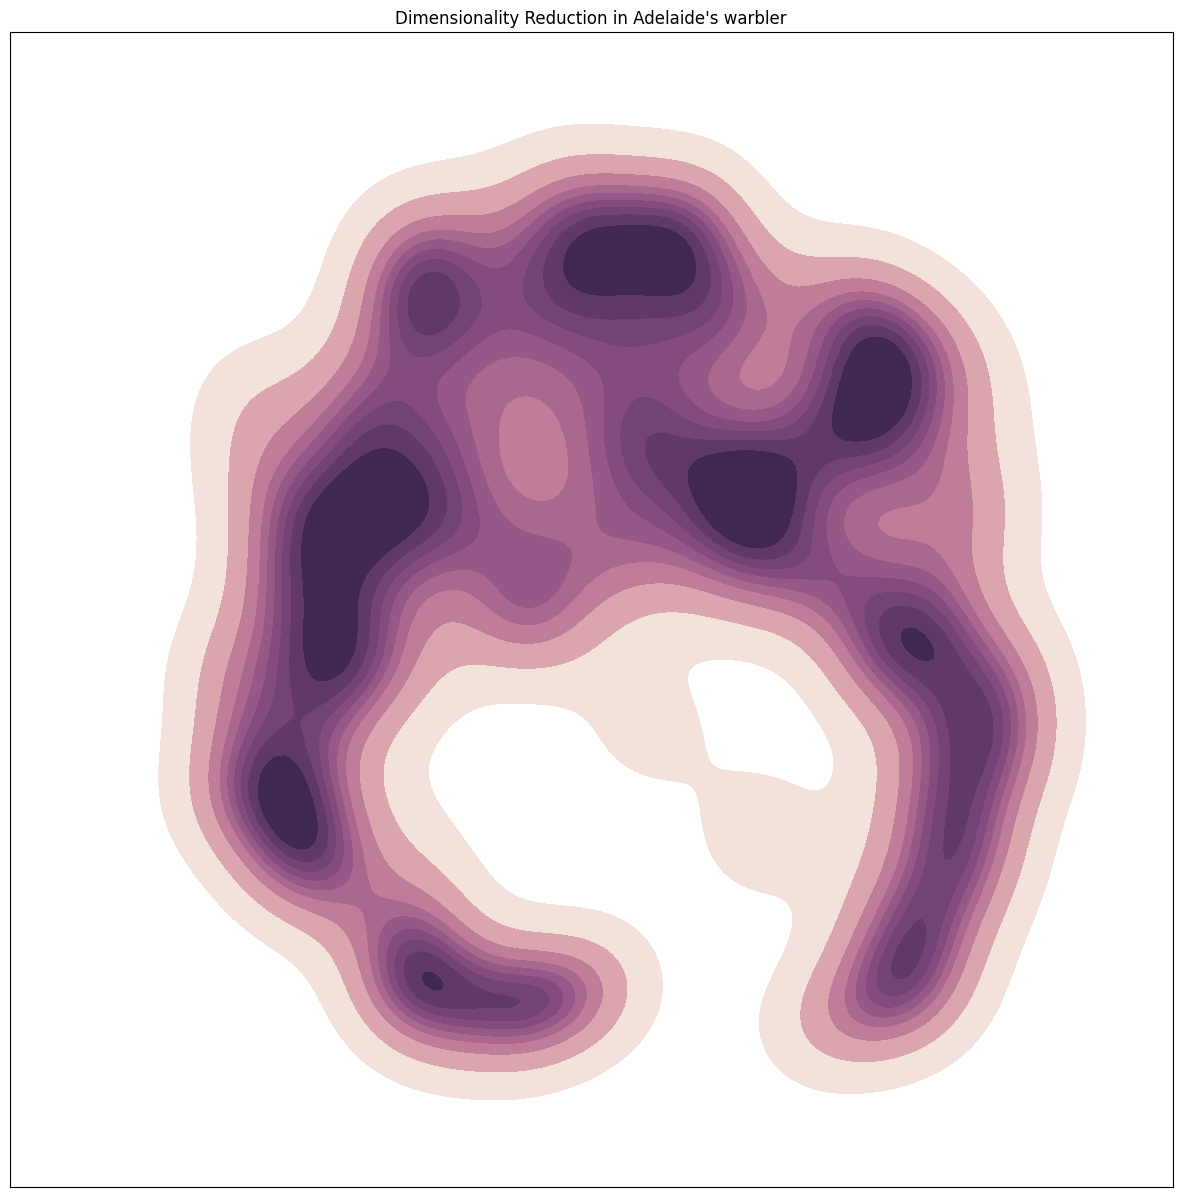

In [6]:
title = 'Dimensionality Reduction in Adelaide\'s warbler'

figsize = (15, 15)
plt.figure(figsize=figsize)

cmap = sns.cubehelix_palette(as_cmap=True, light=1)

ax = sns.kdeplot(
    dataframe, 
    x='umap_x_2d', 
    y='umap_y_2d',
    cmap=cmap, 
    fill=True
)

ax.set(
    title=title,
    xlabel=None, 
    ylabel=None,
    xticklabels=[],
    yticklabels=[]
)

ax.tick_params(
    bottom=False,
    left=False
)

filename = f"kde_projection.png"
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

plt.close()